In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("wind_dataset.csv")

In [3]:
df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [4]:
x = []
for i in range(1961,1979):
    if i % 4 == 0:
        for j in range(366):
            x.append(i + j/366)
    else:
        for j in range(365):
            x.append(i + j/365)

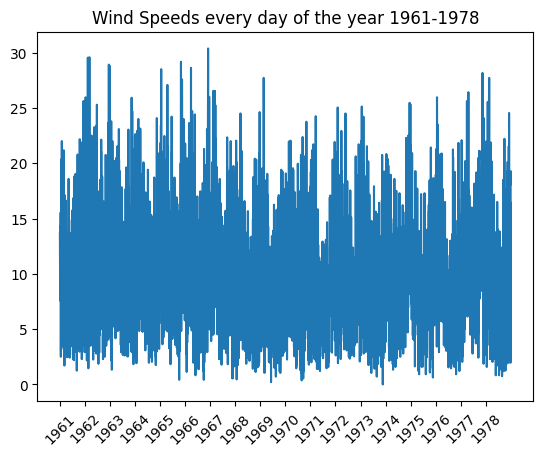

In [5]:
plt.plot(x , df['WIND'])
plt.xticks([1961 + i for i in range(18)] , rotation = 45)
plt.title("Wind Speeds every day of the year 1961-1978")
plt.show()

In [6]:
df['month'] = df['DATE'].str.split('-' , expand = True)[1]
df['year'] = df['DATE'].str.split('-' , expand = True)[0]

In [7]:
new_df = df.groupby(['year' , 'month']).mean().reset_index()

In [8]:
x_month = np.array([[i + j/12 for j in range(12)] for i in range(1961,1979)]).reshape(-1,)
x_month

array([1961.        , 1961.08333333, 1961.16666667, 1961.25      ,
       1961.33333333, 1961.41666667, 1961.5       , 1961.58333333,
       1961.66666667, 1961.75      , 1961.83333333, 1961.91666667,
       1962.        , 1962.08333333, 1962.16666667, 1962.25      ,
       1962.33333333, 1962.41666667, 1962.5       , 1962.58333333,
       1962.66666667, 1962.75      , 1962.83333333, 1962.91666667,
       1963.        , 1963.08333333, 1963.16666667, 1963.25      ,
       1963.33333333, 1963.41666667, 1963.5       , 1963.58333333,
       1963.66666667, 1963.75      , 1963.83333333, 1963.91666667,
       1964.        , 1964.08333333, 1964.16666667, 1964.25      ,
       1964.33333333, 1964.41666667, 1964.5       , 1964.58333333,
       1964.66666667, 1964.75      , 1964.83333333, 1964.91666667,
       1965.        , 1965.08333333, 1965.16666667, 1965.25      ,
       1965.33333333, 1965.41666667, 1965.5       , 1965.58333333,
       1965.66666667, 1965.75      , 1965.83333333, 1965.91666

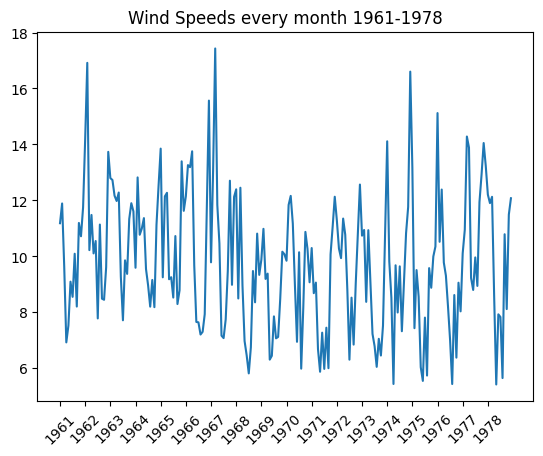

In [9]:
plt.plot(x_month , new_df['WIND'])
plt.xticks([1961 + i for i in  range(18)] , rotation = 45)
plt.title("Wind Speeds every month 1961-1978")
plt.show()

In [10]:
for i in new_df.columns:
    new_df[i].fillna(new_df[i].mean() , inplace = True)



In [11]:
new_df.corr()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
WIND,1.000000,-0.040567,0.152803,0.150172,-0.563580,0.171224,-0.518129,-0.487060
IND,-0.040567,1.000000,-0.093469,-0.084518,-0.174988,-0.046086,-0.115851,-0.190347
RAIN,0.152803,-0.093469,1.000000,0.082745,-0.119623,0.061101,-0.054894,-0.039584
IND.1,0.150172,-0.084518,0.082745,1.000000,-0.004809,0.950332,-0.005698,0.000213
T.MAX,-0.563580,-0.174988,-0.119623,-0.004809,1.000000,-0.091465,0.964364,0.861590
IND.2,0.171224,-0.046086,0.061101,0.950332,-0.091465,1.000000,-0.075881,-0.084038
T.MIN,-0.518129,-0.115851,-0.054894,-0.005698,0.964364,-0.075881,1.000000,0.889242
T.MIN.G,-0.487060,-0.190347,-0.039584,0.000213,0.861590,-0.084038,0.889242,1.000000


In [37]:
df.columns

Index(['DATE', 'WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN',
       'T.MIN.G', 'month', 'year'],
      dtype='object')

In [13]:
seasonality = np.array([[i, np.cos(np.pi * i/6) , np.sin(np.pi * i/6)] for i in range(1,18*12+1)])
X = np.hstack((X , seasonality))

In [14]:
Y = new_df['WIND'].to_numpy()

In [15]:
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
predictions = X @ beta

In [16]:
beta

array([-3.68638241e-02,  6.21744723e-01,  3.55766975e-01,  6.60681679e-01,
       -2.48828365e-01, -5.81607591e-02, -1.08736926e-03,  4.04509278e+00,
        3.38483103e+00])

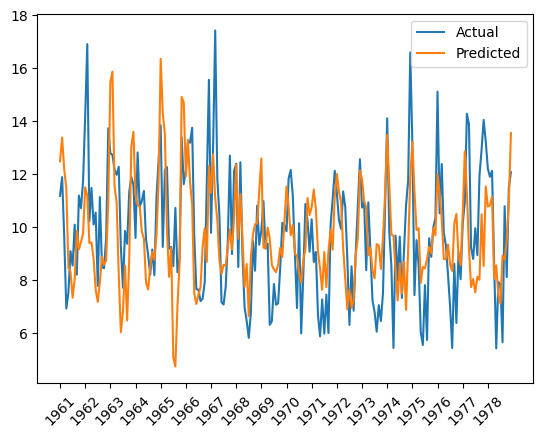

In [17]:
plt.plot(x_month , new_df['WIND'] , label = "Actual")
plt.plot(x_month , predictions , label = "Predicted")
plt.xticks([1961 + i for i in  range(18)] , rotation = 45)
plt.legend()
plt.show()

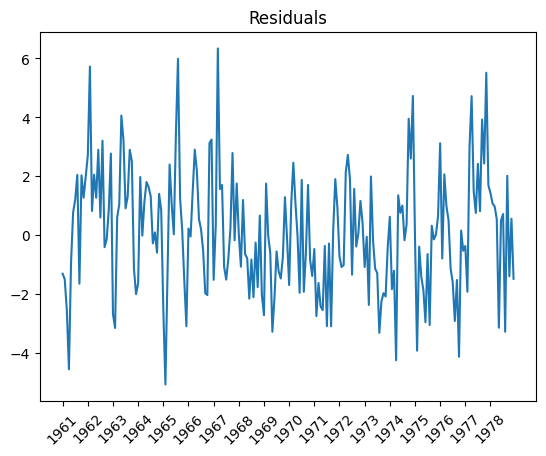

In [18]:
residuals = new_df['WIND'] - predictions
plt.plot(x_month , residuals)
plt.xticks([1961 + i for i in  range(18)] , rotation = 45)
plt.title("Residuals")
plt.show()

In [19]:
def ACF(vals,lag):
    if(lag == 0):
        return 1
    vals = np.array(vals)
    mean = vals.mean()
    x_ahead  = vals[lag:]
    x_behind = vals[:-lag]
    return np.sum((x_ahead-mean)*(x_behind-mean))/np.sum((vals-mean)**2)

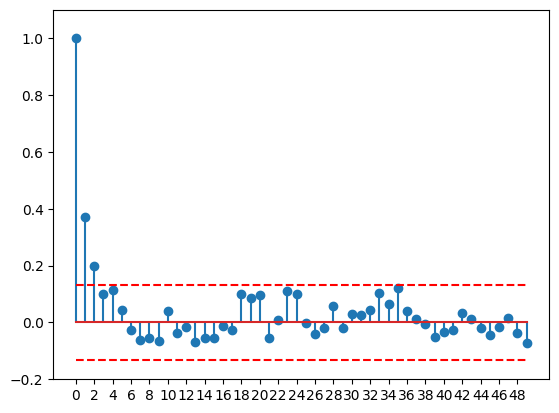

In [20]:
acf = []

for l in range(0,50):
    acf.append(ACF(residuals,l))

plt.stem([i for i in range(50)] , acf)
plt.xticks([2*i for i in range(25)])
plt.ylim(-0.2,1.1)
plt.plot([i for i in range(50)] , [1.96/np.sqrt(len(residuals)) for i in range(50)], 'r--')
plt.plot([i for i in range(50)] , [-1.96/np.sqrt(len(residuals)) for i in range(50)], 'r--')

plt.show()

In [21]:
d = 12
n = len(new_df['WIND'])
print(n)

216


In [22]:
# X_train, X_test, wind_train, wind_test = sklearn.model_selection.train_test_split(new_df[data_cols], new_df["WIND"], shuffle=False)
# print(wind_test.get_loc[0])

MA filter (for when d is even)

In [23]:
def ma_filter(t, Y, d):
  q = int(d/2)
  n = len(Y)
  if t<q or t>n-1-q:
    return 0
  m = 0.5*Y[t-q] + 0.5*Y[t+q]
  for i in range(1, 2*q):
    m+= Y[t-q +i]
  return m/d

Wk is the mean of the deviations (Xk+j*d−Mk+j*d)

In [24]:
def wk(k, Y, d):
  k = k%d #periodic function
  n = len(Y)
  q = d/2
  sum = 0
  count = 0
  for j in range(0, n):
    if (k+j*d >= q and k+j*d<=n-1-q):
      count+=1
      sum+=Y[k+j*d] - ma_filter(k+j*d, Y, d)
  if count == 0:
    return 0
  return float(sum/count)

Sk refers to the seasonality

In [25]:
sk = [wk(i, new_df["WIND"], d) for i in range(n)]
sk_avg = sum(sk[:d])/d
print(sk_avg)
sk = np.array(sk) - sk_avg
np.mean(np.array(sk))

0.007334254647199538


-2.4671622769447922e-17

get Mt from the deseasonalised data

In [34]:
deseasonalised_data = new_df["WIND"] - sk
deseasonalised_data

0       9.163960
1      10.542416
2       8.054601
3       6.327511
4       8.471515
         ...    
211     7.586440
212    12.148257
213     8.502402
214    10.574547
215    10.082232
Name: WIND, Length: 216, dtype: float64

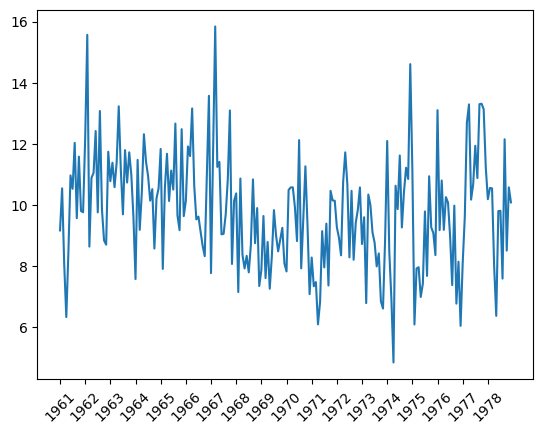

In [35]:
plt.plot(x_month , deseasonalised_data)
plt.xticks([1961 + i for i in  range(18)] , rotation = 45)
plt.show()

In [27]:
mt = [ma_filter(t, deseasonalised_data, d) for t in range(n)]

noise = Xt - Mt - St (free of systematic components)

In [28]:
noise = new_df["WIND"] - mt - sk
noise = noise[6:210] ## removing first q and last q elements
noise

6      0.668485
7      1.836208
8     -0.863388
9      0.939896
10    -1.137626
         ...   
205    0.100697
206    0.270636
207   -2.032350
208   -3.346861
209    0.237590
Name: WIND, Length: 204, dtype: float64

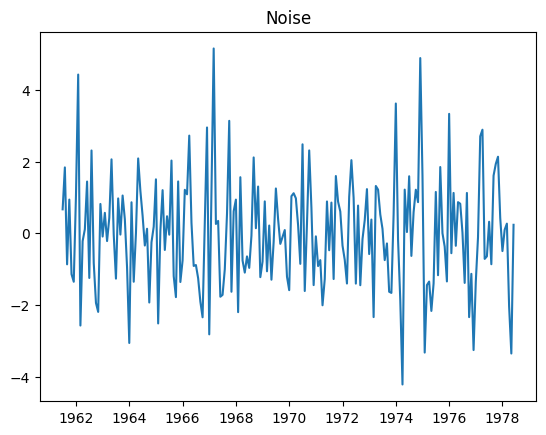

In [29]:
plt.plot(x_month[6:210] , noise)
plt.xticks([1962+2*i for i in range(9)])
plt.title("Noise")
plt.show()

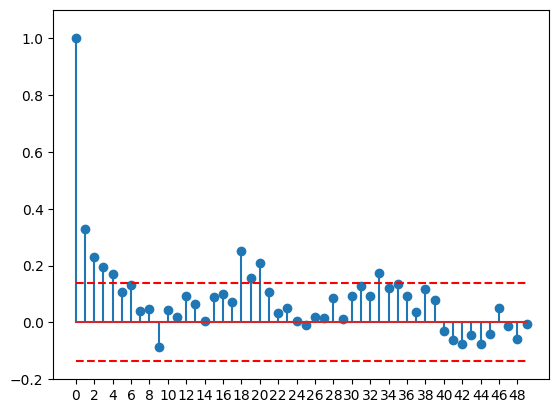

In [36]:
acf = []

for l in range(0,50):
    acf.append(ACF(deseasonalised_data,l))

plt.stem([i for i in range(50)] , acf)
plt.xticks([2*i for i in range(25)])
plt.ylim(-0.2,1.1)
plt.plot([i for i in range(50)] , [1.96/np.sqrt(len(noise)) for i in range(50)], 'r--')
plt.plot([i for i in range(50)] , [-1.96/np.sqrt(len(noise)) for i in range(50)], 'r--')

plt.show()

In [31]:
train = noise[:156]
test = noise[156:]
test

162    1.589462
163   -0.628695
164    0.590418
165    1.214295
166    0.868720
167    4.881151
168    1.610412
169   -3.321145
170   -1.441469
171   -1.343252
172   -2.161309
173   -1.395034
174    1.152577
175   -1.166629
176    1.846560
177    0.003020
178   -0.370610
179   -1.339987
180    3.327632
181   -0.553404
182    1.125345
183   -0.347116
184    0.868281
185    0.824226
186    0.023589
187   -1.380811
188    1.124754
189   -2.333700
190   -1.128132
191   -3.250672
192   -1.351826
193   -0.106753
194    2.701030
195    2.886151
196   -0.711926
197   -0.640569
198    0.322749
199   -0.860567
200    1.607035
201    1.932169
202    2.133077
203    0.431170
204   -0.493968
205    0.100697
206    0.270636
207   -2.032350
208   -3.346861
209    0.237590
Name: WIND, dtype: float64

In [32]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(1,1,0))
model_fit=model.fit()
model_fit.summary()
tmp=model_fit.predict(start=156,end=203,dynamic=True)
tmp


162    0.553171
163    0.327015
164    0.425979
165    0.382673
166    0.401624
167    0.393331
168    0.396960
169    0.395372
170    0.396067
171    0.395763
172    0.395896
173    0.395837
174    0.395863
175    0.395852
176    0.395857
177    0.395855
178    0.395855
179    0.395855
180    0.395855
181    0.395855
182    0.395855
183    0.395855
184    0.395855
185    0.395855
186    0.395855
187    0.395855
188    0.395855
189    0.395855
190    0.395855
191    0.395855
192    0.395855
193    0.395855
194    0.395855
195    0.395855
196    0.395855
197    0.395855
198    0.395855
199    0.395855
200    0.395855
201    0.395855
202    0.395855
203    0.395855
204    0.395855
205    0.395855
206    0.395855
207    0.395855
208    0.395855
209    0.395855
Name: predicted_mean, dtype: float64

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test, tmp)

3.0756656144675154

In [38]:
df_marks = pd.read_csv("/Users/gowrigovindaraj/Downloads/Grades Time series  - Sheet0.csv")

In [43]:
df_marks.columns = ['Name1','Name2' , 'Mail', 'Avg', 'Mark1', 'Mark2', 'Mark3']

In [41]:
df_marks = df_marks[4:]

In [44]:
df_marks

,Name1,Name2,Mail,Avg,Mark1,Mark2,Mark3
4,TALLAMRAJU,AMULYA,ai20btech11003@iith.ac.in,86.17%,8,15.5,17
5,MEHTA,CHIRAG,ai20btech11006@iith.ac.in,NaN,10,18.5,17
6,VARSHITHA,GANJI,ai20btech11009@iith.ac.in,NaN,8,18,16
7,Bheemeswara Vijay Varma,Kanumuri,ai20btech11012@iith.ac.in,NaN,4,18,16
8,SACHIN,KARUMANCHI,ai20btech11013@iith.ac.in,NaN,0,12.5,15
9,VALLEPU,MANIKANTA,ai20btech11014@iith.ac.in,NaN,NaN,NaN,12
10,NaN,SUJAL,ai20btech11020@iith.ac.in,NaN,NaN,NaN,NaN
11,GOYAL,TANMAY,ai20btech11021@iith.ac.in,NaN,10,18,17
12,Yadav,Tanay,ai20btech11026@iith.ac.in,NaN,10,11.5,15
13,TADIKAMALLA,YASHAS,ai20btech11027@iith.ac.in,NaN,10,19,17


In [51]:
new_df_marks = pd.DataFrame()

In [52]:
new_df_marks['Name'] = df_marks['Name1'] + ' ' + df_marks['Name2']

In [53]:
new_df_marks['Quiz1'] = df_marks['Mark1']
new_df_marks['Quiz2'] = df_marks['Mark2']
new_df_marks['Midsem'] = df_marks['Mark3']

In [60]:
new_df_marks

,Name,Quiz1,Quiz2,Midsem,Total
4,TALLAMRAJU AMULYA,8,15.5,17,2.574219
5,MEHTA CHIRAG,10,18.5,17,2.925781
6,VARSHITHA GANJI,8,18,16,2.640625
7,Bheemeswara Vijay Varma Kanumuri,4,18,16,2.242188
8,SACHIN KARUMANCHI,0,12.5,15,1.507812
9,VALLEPU MANIKANTA,NaN,NaN,12,NaN
10,NaN,NaN,NaN,NaN,NaN
11,GOYAL TANMAY,10,18,17,2.900391
12,Yadav Tanay,10,11.5,15,2.457031
13,TADIKAMALLA YASHAS,10,19,17,2.949219


In [62]:
new_df_marks['Total'] = np.float16(new_df_marks['Quiz1'])/10 + np.float16(new_df_marks['Quiz2'])/20 + np.float16(new_df_marks['Midsem'])/17

In [61]:
new_df_marks.fillna(0 , inplace = True)

In [63]:
new_df_marks

,Name,Quiz1,Quiz2,Midsem,Total
4,TALLAMRAJU AMULYA,8,15.5,17,2.574219
5,MEHTA CHIRAG,10,18.5,17,2.925781
6,VARSHITHA GANJI,8,18,16,2.640625
7,Bheemeswara Vijay Varma Kanumuri,4,18,16,2.242188
8,SACHIN KARUMANCHI,0,12.5,15,1.507812
9,VALLEPU MANIKANTA,0,0,12,0.706055
10,0,0,0,0,0.000000
11,GOYAL TANMAY,10,18,17,2.900391
12,Yadav Tanay,10,11.5,15,2.457031
13,TADIKAMALLA YASHAS,10,19,17,2.949219


In [70]:
new_df_marks['Quartile'] = pd.qcut(new_df_marks['Total'], 7, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5','Q6','Q7'])

In [71]:
new_df_marks

,Name,Quiz1,Quiz2,Midsem,Total,Quartile
4,TALLAMRAJU AMULYA,8,15.5,17,2.574219,Q5
5,MEHTA CHIRAG,10,18.5,17,2.925781,Q7
6,VARSHITHA GANJI,8,18,16,2.640625,Q5
7,Bheemeswara Vijay Varma Kanumuri,4,18,16,2.242188,Q4
8,SACHIN KARUMANCHI,0,12.5,15,1.507812,Q2
9,VALLEPU MANIKANTA,0,0,12,0.706055,Q1
10,0,0,0,0,0.000000,Q1
11,GOYAL TANMAY,10,18,17,2.900391,Q6
12,Yadav Tanay,10,11.5,15,2.457031,Q4
13,TADIKAMALLA YASHAS,10,19,17,2.949219,Q7
